# TUH EEG Events Corpus EDA

### Install Required Libraries

In [1]:
pip install pyedflib mne

  Using cached pyedflib-0.1.40.tar.gz (2.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.2.4-cp313-cp313-macosx_10_13_x86_64.whl.metadata (62 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_10_13_x86_64.whl.metadata (61 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.1 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (4.0 kB)
   ━━━━━━━━━━━

### Read an EDF file

In [2]:
import pyedflib
import numpy as np

# Load the EDF file
file_path = "edf/train/aaaaaadg/aaaaaadg_00000002.edf"
edf_reader = pyedflib.EdfReader(file_path)

n_channels = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
signal_freqs = edf_reader.getSampleFrequencies()

print(f"Number of channels: {n_channels}")
print("Labels:", signal_labels)


Number of channels: 31
Labels: ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG C3P-REF', 'EEG C4P-REF', 'EEG SP1-REF', 'EEG SP2-REF', 'EMG-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG 31-REF', 'EEG 32-REF']


### Access Signal Data

File duration: 300.00 seconds


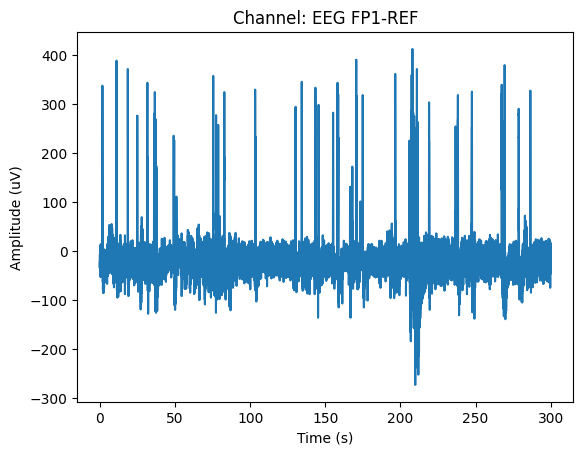

In [3]:
# Here first 10 seconds from channel 0

# Get duration (in seconds)
duration = edf_reader.getFileDuration()
print(f"File duration: {duration:.2f} seconds")

# Read signal from a specific channel
channel_idx = 0 
signal = edf_reader.readSignal(channel_idx)

# Optionally, get signal time axis
fs = edf_reader.getSampleFrequency(channel_idx)
time = np.linspace(0, len(signal) / fs, len(signal))

# Plot
import matplotlib.pyplot as plt
plt.plot(time, signal)
plt.title(f"Channel: {signal_labels[channel_idx]}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.show()


### Read label files (.lab)

In [5]:
def read_lab_file(path):
    with open(path, "r") as f:
        lines = f.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 3:
            start, end, label = float(parts[0]), float(parts[1]), parts[2].lower()
            annotations.append((start, end, label))
    return annotations

# Example
lab_path = "edf/train/aaaaaadg/aaaaaadg_00000002_ch000.lab"
annotations = read_lab_file(lab_path)
print(annotations[:5])


[(27150000.0, 27250000.0, 'artf'), (27250000.0, 27350000.0, 'artf'), (27350000.0, 27450000.0, 'artf'), (27450000.0, 27550000.0, 'artf'), (27550000.0, 27650000.0, 'artf')]
